

```
# 2 Asymptotic error
```



### 3 Nearest Neighbor Classi cation on Real Data
* 3.1 

In [0]:
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()
print(digits.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [0]:
data = digits['data']
images = digits['images']
target = digits['target']
target_names = digits['target_names']

In [4]:
print(data.dtype,data.shape)

float64 (1797, 64)


In [0]:
import numpy as np
import matplotlib.pyplot as plt


In [0]:
def find_img(images,num):
  index = np.where(target==num)
  print(index)
  img_num = images[index]
  return img_num

In [40]:
img = find_img(images,3)[0]
img.shape

(array([   3,   13,   23,   45,   59,   60,   62,   63,   83,   89,   91,
         98,  103,  133,  143,  153,  175,  189,  190,  192,  193,  213,
        217,  219,  226,  231,  259,  269,  279,  301,  315,  316,  318,
        319,  339,  345,  347,  354,  359,  385,  389,  399,  409,  431,
        445,  446,  448,  449,  469,  475,  477,  484,  489,  519,  529,
        539,  561,  575,  576,  578,  579,  599,  605,  607,  614,  619,
        649,  659,  669,  691,  705,  706,  708,  709,  729,  735,  737,
        744,  749,  779,  789,  799,  821,  835,  836,  838,  839,  859,
        865,  867,  874,  879,  908,  918,  928,  950,  961,  962,  964,
        965,  985,  990,  992,  999, 1004, 1032, 1042, 1052, 1074, 1086,
       1087, 1089, 1090, 1110, 1116, 1118, 1125, 1130, 1160, 1170, 1180,
       1202, 1216, 1217, 1219, 1220, 1240, 1246, 1248, 1255, 1260, 1290,
       1300, 1310, 1332, 1346, 1347, 1349, 1350, 1370, 1376, 1378, 1385,
       1390, 1418, 1428, 1438, 1460, 1474, 1475, 1

(8, 8)

In [0]:
assert 2 == len(img.shape)

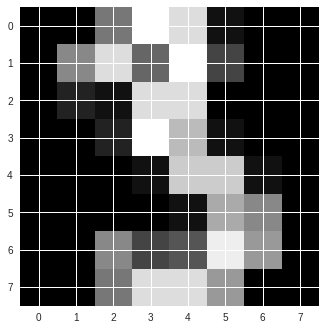

In [14]:
plt.figure()
plt.gray()
plt.imshow(img, interpolation="nearest")
plt.show()

In [0]:
from sklearn.model_selection import train_test_split
X_all = data
y_all = target
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.4,random_state=0)

### 3.2 Distance using loop

In [0]:
def dist_loop(train_set, test_set):
  
  N = train_set.shape[0]
  M = test_set.shape[0]
  dist_matrix = np.zeros((N,M))
  for i in range(N):
    for j in range(M):
      dist_matrix[i][j] = np.sqrt(np.sum(np.square(train_set[i]-test_set[j]), axis=0))
  #print('shape of matrix:', dist_matrix.shape)
  return dist_matrix

In [17]:
%timeit dist_loop(X_train, X_test)

1 loop, best of 3: 5.53 s per loop


In [0]:
dist_matrix = dist_loop(X_train, X_test)

In [21]:
dist_matrix.shape

(1078, 719)

### 3.3 Distance using vectorization

In [0]:
import numpy
na = numpy.newaxis


In [0]:
def dist_vec(train_set, test_set):
  matrix = np.sqrt(np.sum(np.square(train_set[:,:,na]-test_set.T),axis=1))
  #print('shape of matrix:', matrix.shape)
  return matrix  

In [24]:
%timeit dist_vec(X_train,X_test)


1 loop, best of 3: 330 ms per loop


In [0]:
matrix = dist_vec(X_train,X_test)


In [26]:
matrix.shape

(1078, 719)

In [31]:
neigbors = np.argsort(matrix,axis=1)[3]
neigbors.shape


(719,)

In [32]:
y_test[neigbors]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 0, 6, 6, 9, 0, 6, 8,
       9, 9, 4, 9, 8, 5, 4, 4, 6, 9, 8, 5, 5, 5, 9, 0, 9, 8, 9, 8, 8, 8,
       8, 9, 8, 4, 5, 7, 4, 2, 9, 6, 6, 4, 4, 4, 4, 6, 5, 9, 6, 4, 9, 5,
       4, 6, 5, 9, 3, 8, 8, 6, 9, 8, 6, 8, 6, 9, 5, 3, 7, 5, 8, 3, 6, 9,
       5, 6, 6, 6, 9, 4, 6, 4, 4, 9, 7, 9, 5, 6, 9, 6, 5, 6, 5, 8, 5, 7,
       4, 4, 7, 8, 8, 5, 9, 5, 6, 9, 4, 8, 6, 8, 4, 6, 8, 3, 8, 4, 6, 5,
       8, 6, 5, 4, 5, 5, 3, 5, 7, 5, 6, 5, 5, 9, 6, 9, 9, 5, 7, 9, 7, 4,
       8, 8, 4, 8, 9, 3, 8, 3, 8, 1, 8, 3, 6, 8, 6, 6, 2, 9, 5, 7, 7, 4,
       4, 6, 5, 9, 4, 6, 8, 8, 6, 5, 4, 7, 5, 8, 8, 6, 5, 8, 9, 8, 4, 6,
       9, 8, 7, 8, 3, 2, 4, 9, 9, 2, 8, 4, 5, 8, 2, 4, 8, 6, 2, 2, 6, 8,
       2, 4, 8, 5, 6, 5, 7, 6, 5, 8, 2, 3, 2, 8, 9, 5, 5, 2, 8, 6, 9, 2,
       3, 3, 3, 5, 8, 5, 6, 3, 5, 7, 4, 1, 8, 8, 7,

## 3.4 K-Nearest Neighbors

In [0]:
# find the neighbor for a given number
def knn(train_set, test_set, train_y, test_y, k, number):
    distance_matrix = dis_vec(train_set,test_set)
    k_neighbors = np.argsort(distance_matrix,axis=1)[number][:k]
    return (number, test_y[k_neighbors])

In [0]:
idx_3 = np.where(target==3)
idx_3
X_3,target_3 = digits.data[idx_3], digits.target[idx_3]

In [46]:
print(X_3.shape,target_3.shape)

(183, 64) (183,)


In [0]:
idx_9 = np.where(target==9)
idx_9
X_9,target_9 = digits.data[idx_9], digits.target[idx_9]

In [48]:
print(X_9.shape,target_9.shape)

(180, 64) (180,)
